In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('..\data\gdp_percapita.csv')

In [3]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2020  1970.560169              NaN
1        Afghanistan  2019  2065.036235              NaN
2        Afghanistan  2018  2033.804389              NaN
3        Afghanistan  2017  2058.400221              NaN
4        Afghanistan  2016  2057.067978              NaN
...              ...   ...          ...              ...
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN

[7176 rows x 4 columns]


In [4]:
type(gdp_df)

pandas.core.frame.DataFrame

4 columns 7176 rows

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
del gdp_df['Value Footnotes']


In [6]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value':'GDP_Per_Capita'})

In [7]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
year_counts = gdp_df.groupby('Country')['Year'].nunique()


In [9]:
print(year_counts)

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: Year, Length: 242, dtype: int64


In [10]:
gdp_df['Country'].value_counts()


Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [11]:
#filtering 2020 data 
gdp_2020 = gdp_df[gdp_df['Year']==2020]
print(gdp_2020)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]


In [12]:
# min and max for range
print(gdp_2020['GDP_Per_Capita'].min())
print(gdp_2020['GDP_Per_Capita'].max())

731.064073644609
112557.309471818


(array([110.,  61.,  22.,  21.,  14.,   7.,   1.,   2.,   1.,   1.]),
 array([   500.,  11950.,  23400.,  34850.,  46300.,  57750.,  69200.,
         80650.,  92100., 103550., 115000.]),
 <BarContainer object of 10 artists>)

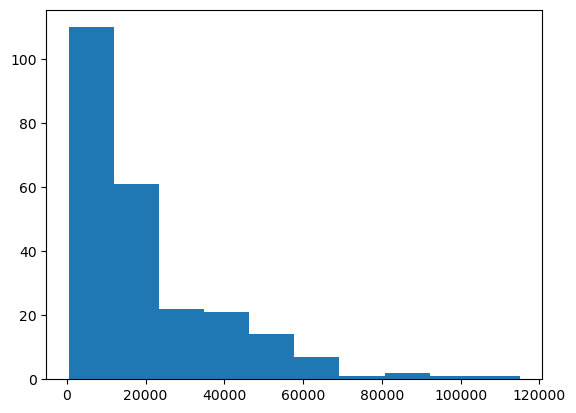

In [13]:
#histogram
plt.hist(gdp_2020.GDP_Per_Capita, range=(500,115000))

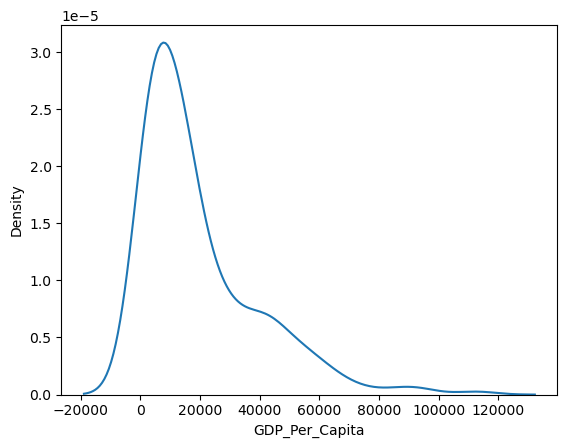

In [14]:
#density
sns.kdeplot(gdp_2020['GDP_Per_Capita'])
plt.show()

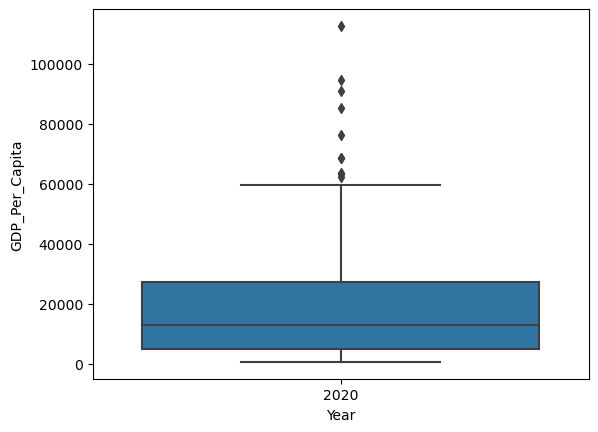

In [15]:
#boxplot
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

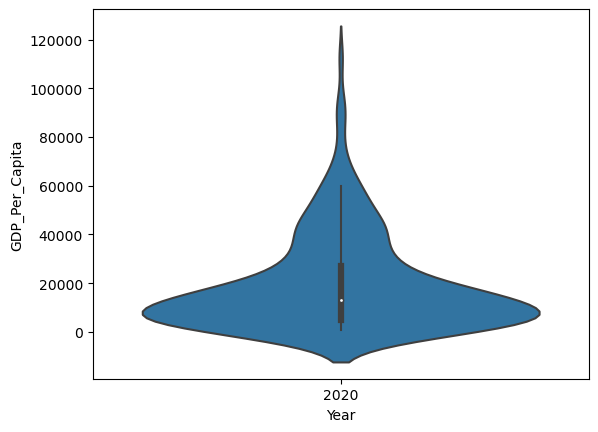

In [16]:
#violin
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])
plt.show

9. What was the median GDP per capita value in 2020?

In [17]:
gdp_2020['GDP_Per_Capita'].median()

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [18]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
10                    Afghanistan  2010     1957.029070
19    Africa Eastern and Southern  2020     3491.978104
29    Africa Eastern and Southern  2010     3545.205203
39    Africa Eastern and Southern  2000     2915.472987
...                           ...   ...             ...
7144                       Zambia  1990     2190.181724
7145                     Zimbabwe  2020     2134.555461
7155                     Zimbabwe  2010     1813.531764
7165                     Zimbabwe  2000     2771.060576
7175                     Zimbabwe  1990     2652.129209

[918 rows x 3 columns]


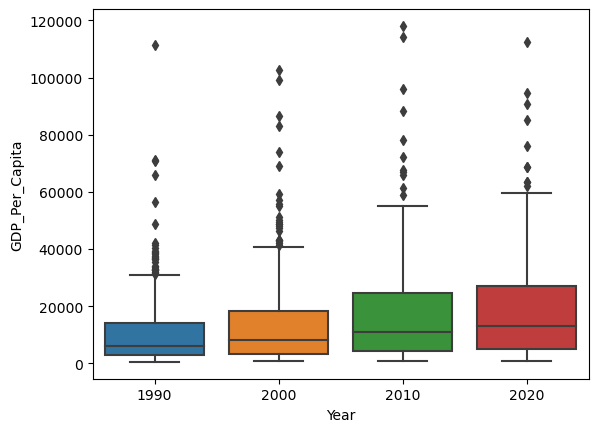

In [19]:
#boxplot
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )
plt.show()

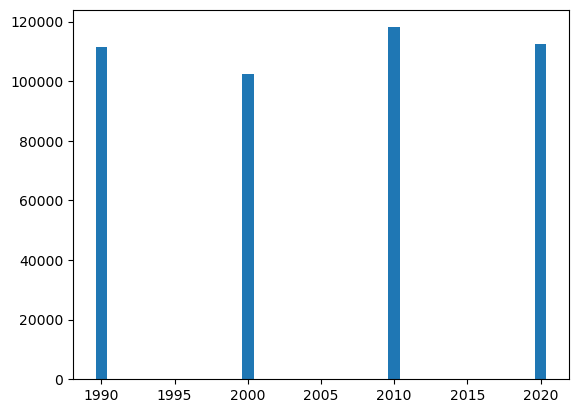

In [20]:
#bar plot
plt.bar(gdp_decades.Year, gdp_decades.GDP_Per_Capita)
plt.show()

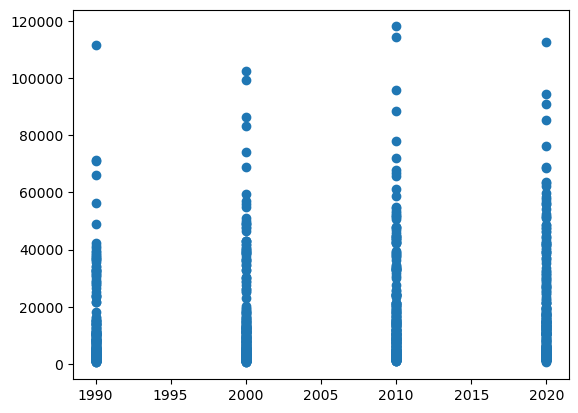

In [21]:
#scatter plot
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita)
plt.show()

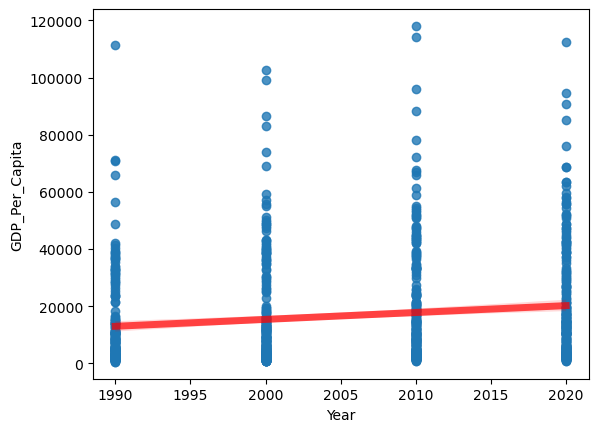

In [22]:
# color : color of the line, alpha : opacity value of the line, lw : line width
# A scatterplot with a trend line
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

11. Which country was the first to have a GDP per capita greater than $100,000?


In [23]:
gdp_df.loc[(gdp_df['Year'] == 1990) & (gdp_df['GDP_Per_Capita'] > 100000)]


,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [24]:
max_row = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]
country_with_max_gdp = max_row['Country']
print(country_with_max_gdp)

Luxembourg


idxmax() function finds the index of the row that contains the maximum GDP per capita value in the "GDP_Per_Capita" column. Then, the loc function extracts the entire row with that index. Finally, it outputs the name of the country

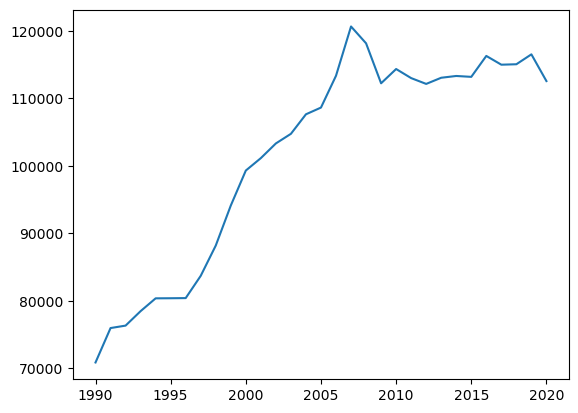

In [25]:
gdp_df_lux = gdp_df[gdp_df["Country"] == "Luxembourg"]
plt.plot(gdp_df_lux["Year"], gdp_df_lux["GDP_Per_Capita"])
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [26]:
min_row = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmin()]
country_with_min_gdp = min_row['Country']
print(country_with_min_gdp)

Burundi


idxmax() function finds the index of the row that contains the maximum GDP per capita value in the "GDP_Per_Capita" column. Then, the loc function extracts the entire row with that index. Finally, it outputs the name of the country

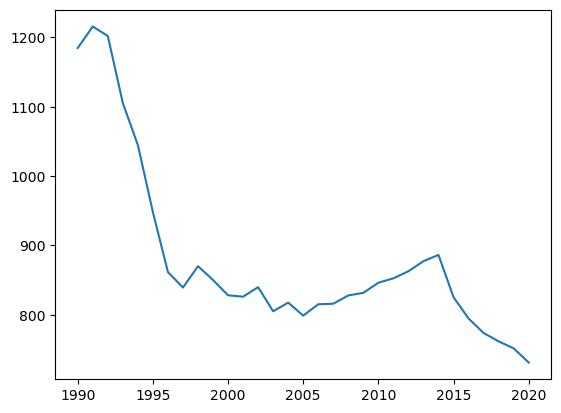

In [27]:
gdp_df_bur = gdp_df[gdp_df["Country"] == "Burundi"]
plt.plot(gdp_df_bur["Year"], gdp_df_bur["GDP_Per_Capita"])
plt.show()

     Country  Year  GDP_Per_Capita
914  Burundi  2020      731.064074
915  Burundi  2019      751.443405
916  Burundi  2018      761.524143
917  Burundi  2017      773.572859
918  Burundi  2016      794.604340
919  Burundi  2015      825.205574
920  Burundi  2014      886.235296
921  Burundi  2013      877.272857
922  Burundi  2012      862.715651
923  Burundi  2011      852.502576
924  Burundi  2010      846.169112
925  Burundi  2009      831.564843
926  Burundi  2008      827.792334
927  Burundi  2007      815.908213
928  Burundi  2006      815.053647
929  Burundi  2005      798.704845
930  Burundi  2004      817.461177
931  Burundi  2003      804.884232
932  Burundi  2002      839.777920
933  Burundi  2001      826.028960
934  Burundi  2000      828.000479
935  Burundi  1999      850.046951
936  Burundi  1998      870.043821
937  Burundi  1997      839.196865
938  Burundi  1996      861.482899
939  Burundi  1995      947.822231
940  Burundi  1994     1044.716092
941  Burundi  1993  

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

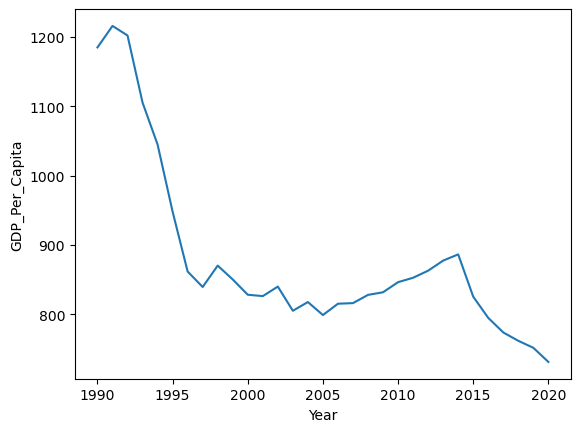

In [28]:
gdp_burundi = gdp_df[gdp_df['Country'] == 'Burundi']
print(gdp_burundi)
sns.lineplot(x=gdp_burundi['Year'],
            y=gdp_burundi['GDP_Per_Capita'])

Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [29]:
print(gdp_2020)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]


In [30]:
gdp_1990 = gdp_df[gdp_df['Year']==1990]
print(gdp_1990)

                          Country  Year  GDP_Per_Capita
49    Africa Eastern and Southern  1990     3083.976800
80     Africa Western and Central  1990     2810.341129
111                       Albania  1990     4827.034551
142                       Algeria  1990     8746.340762
173                        Angola  1990     5758.950488
...                           ...   ...             ...
7024                      Vanuatu  1990     2855.554643
7055                      Vietnam  1990     2066.372215
7113                        World  1990     9704.621768
7144                       Zambia  1990     2190.181724
7175                     Zimbabwe  1990     2652.129209

[206 rows x 3 columns]


In [31]:
merged_df = pd.merge(gdp_1990, gdp_2020, on='Country')
print(merged_df)

                         Country  Year_x  GDP_Per_Capita_x  Year_y  \
0    Africa Eastern and Southern    1990       3083.976800    2020   
1     Africa Western and Central    1990       2810.341129    2020   
2                        Albania    1990       4827.034551    2020   
3                        Algeria    1990       8746.340762    2020   
4                         Angola    1990       5758.950488    2020   
..                           ...     ...               ...     ...   
200                      Vanuatu    1990       2855.554643    2020   
201                      Vietnam    1990       2066.372215    2020   
202                        World    1990       9704.621768    2020   
203                       Zambia    1990       2190.181724    2020   
204                     Zimbabwe    1990       2652.129209    2020   

     GDP_Per_Capita_y  
0         3491.978104  
1         4021.293919  
2        13253.733337  
3        10735.382539  
4         6141.963839  
..             

In [32]:
merged_df['percent_change'] = ((merged_df['GDP_Per_Capita_y'] - merged_df['GDP_Per_Capita_x']) / merged_df['GDP_Per_Capita_x']) * 100


In [33]:
#calculate the percentage change in GDP per capita:
lower_gdp_countries = merged_df[merged_df['percent_change'] < 0]['Country']

In [34]:
# .tolist() is a method used to convert a Pandas Series or DataFrame into a Python list.
print(lower_gdp_countries.tolist())


['Aruba', 'Barbados', 'Brunei', 'Burundi', 'Central African Republic', 'Comoros', 'Congo', 'Dem. Rep. Congo', 'Fragile and conflict affected situations', 'Gabon', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Kyrgyz Republic', 'Madagascar', 'Oman', 'Tajikistan', 'The Bahamas', 'The Gambia', 'Ukraine', 'United Arab Emirates', 'Zimbabwe']


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [35]:
internet_df = pd.read_csv('..\data\internet_use.csv',nrows=4495)
print(internet_df)

     Country or Area  Year     Value  Value Footnotes
0        Afghanistan  2014  6.390000              NaN
1        Afghanistan  2013  5.900000              NaN
2        Afghanistan  2012  5.454545              NaN
3        Afghanistan  2011  5.000000              NaN
4        Afghanistan  2010  4.000000              NaN
...              ...   ...       ...              ...
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN

[4495 rows x 4 columns]


In [36]:
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


In [37]:
internet_df.head()
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [38]:
del internet_df['Value Footnotes']


In [39]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value':'Internet_Users_Pct'})

In [40]:
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


16. Look at the number of observations in this dataset per year. What do you notice?

17. What is the first year to have a non-zero internet users percentage value?

In [41]:
internet_df_zero = internet_df[internet_df["Internet_Users_Pct"] > 0]

In [42]:
print(internet_df_zero)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4489     Zimbabwe  1998            0.081648
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739

[4106 rows x 3 columns]


In [43]:
internet_df_zero.sort_values("Year", ascending=True)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


18. How does the distribution of internet users percent differ for 2000 and 2014?


In [44]:
int_df_filtered = internet_df[internet_df['Year'].isin([2000, 2014])]


In [45]:
print(int_df_filtered)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
15        Albania  2014           60.100000
29        Albania  2000            0.114097
36        Algeria  2014           18.090000
50        Algeria  2000            0.491706
...           ...   ...                 ...
4445        Yemen  2000            0.082500
4451       Zambia  2014           17.340000
4465       Zambia  2000            0.191072
4473     Zimbabwe  2014           19.890000
4487     Zimbabwe  2000            0.401434

[401 rows x 3 columns]


In [46]:
int_df_grouped = int_df_filtered.groupby('Year')['Internet_Users_Pct'].mean()
print(int_df_grouped)

Year
2000     8.886166
2014    45.249851
Name: Internet_Users_Pct, dtype: float64


19. For how many countries was the percentage of internet users below 5% in 2014?

In [47]:
low_users = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]


In [48]:
num_countries = len(low_users['Country'].unique())


In [54]:
print(num_countries)

16


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [59]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

In [60]:
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2020     1970.560169                 NaN
1  Afghanistan  2019     2065.036235                 NaN
2  Afghanistan  2018     2033.804389                 NaN
3  Afghanistan  2017     2058.400221                 NaN
4  Afghanistan  2016     2057.067978                 NaN
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
8251   Yemen  1999             NaN            0.056629
8252   Yemen  1998             NaN            0.023323
8253   Yemen  1997             NaN            0.015025
8254   Yemen  1996             NaN            0.000621
8255   Yemen  1990             NaN            0.000000


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [62]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6                     Afghanistan  2014     2102.384604                6.39
25    Africa Eastern and Southern  2014     3677.319414                 NaN
56     Africa Western and Central  2014     4215.646000                 NaN
87                        Albania  2014    11586.833878               60.10
118                       Algeria  2014    11512.690472               18.09
...                           ...   ...             ...                 ...
8147                       Turkey  2014             NaN               51.04
8170                    Venezuela  2014             NaN               57.00
8194                     Viet Nam  2014             NaN               48.31
8214        Virgin Islands (U.S.)  2014             NaN               50.07
8236                        Yemen  2014             NaN               22.55

[281 rows x 4 columns]


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [70]:
sorted_2014 = gdp_and_internet_use_2014.sort_values('Internet_Users_Pct', ascending=False)
print(sorted_2014)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
2803              Iceland  2014    50450.741612               98.16
645               Bermuda  2014    77361.104881               96.80
4880               Norway  2014    62390.130313               96.30
1561              Denmark  2014    52048.335493               95.99
7179              Andorra  2014             NaN               95.90
...                   ...   ...             ...                 ...
6721               Tuvalu  2014     3497.520822                 NaN
6907  Upper middle income  2014    14564.823543                 NaN
7031              Vietnam  2014     7601.858491                 NaN
7062   West Bank and Gaza  2014     5967.073437                 NaN
7089                World  2014    15224.439424                 NaN

[281 rows x 4 columns]


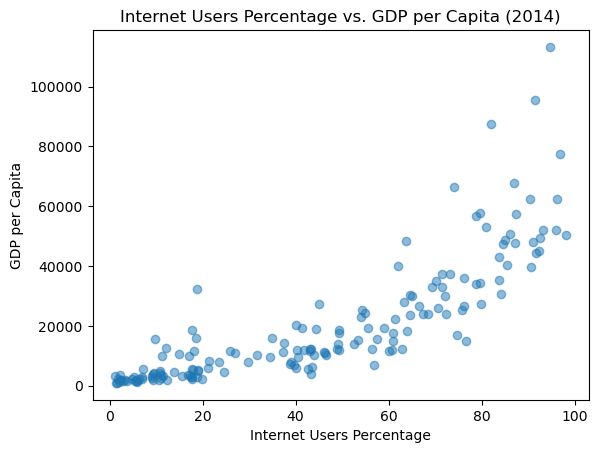

In [63]:
# Create the plot
plt.scatter(gdp_and_internet_use_2014['Internet_Users_Pct'], gdp_and_internet_use_2014['GDP_Per_Capita'], alpha=0.5)
plt.xlabel('Internet Users Percentage')
plt.ylabel('GDP per Capita')
plt.title('Internet Users Percentage vs. GDP per Capita (2014)')

# Show the plot
plt.show()

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?